In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
data = pd.read_csv('/content/gdrive/MyDrive/Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')


print(data.info)

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
# Drop the customerID column
data = data.drop(columns=['customerID'])

In [10]:
# Convert TotalCharges to numeric, coerce errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [11]:
# Fill missing values with median
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [12]:
# Encode binary categorical variables
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
label_encoders = {}
for column in binary_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [13]:
# One-hot encode the remaining categorical variables
data = pd.get_dummies(data, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                     'Contract', 'PaymentMethod'], drop_first=True)

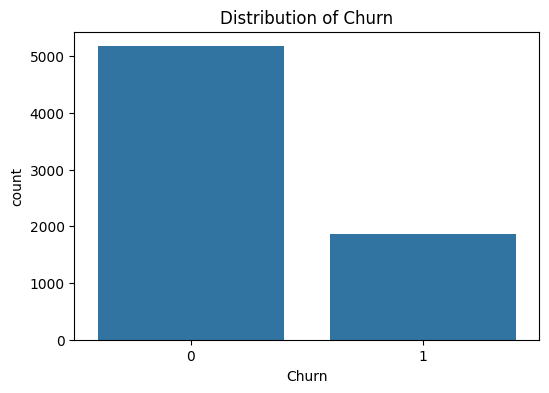

In [14]:
# EDA: Visualize the distribution of the target variable (Churn)
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Churn')
plt.title('Distribution of Churn')
plt.show()

In [15]:
# Split data into features and target
X = data.drop(columns=['Churn'])
y = data['Churn']

In [17]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [18]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Make predictions
y_pred = model.predict(X_test)

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_matrix_output = confusion_matrix(y_test, y_pred)

In [22]:
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report_output)
print('Confusion Matrix:')
print(confusion_matrix_output)

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
[[945  91]
 [203 170]]
